In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [12]:
import matplotlib.patches as mpatches

In [24]:
ds = xr.open_dataset("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp45_tn_mean_annual.nc")
index = ds.indexes['time']
ds['time'] = index.to_datetimeindex()
ds

<ipython-input-24-9bcb720f94e7>:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = index.to_datetimeindex()


<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tn_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           NorESM1-M model output prepared for CMIP5 historical
    history:         2011-06-01T01:20:15Z CMOR rewrote data to comply with CF...
    institution:     Norwegian Climate Centre
    source:          NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-noresm-v...
    redistribution:  Redistribution prohibited. For internal use only.

In [25]:
df = ds.to_dataframe().dropna().reset_index()
df

,lat,lon,time,tn_mean
0,66.623306,-89.045212,1950-01-01,257.204071
1,66.623306,-89.045212,1951-01-01,255.538437
2,66.623306,-89.045212,1952-01-01,255.467987
3,66.623306,-89.045212,1953-01-01,254.634674
4,66.623306,-89.045212,1954-01-01,255.788116
...,...,...,...,...
11507101,40.041039,-74.045807,2096-01-01,282.007874
11507102,40.041039,-74.045807,2097-01-01,281.860657
11507103,40.041039,-74.045807,2098-01-01,281.271240
11507104,40.041039,-74.045807,2099-01-01,282.671326


In [26]:
AllCoordTnMean = df.groupby("time").mean()
AllCoordTnMean

,lat,lon,tn_mean
time,,,
1950-01-01,52.173106,-73.902198,268.828857
1951-01-01,52.173106,-73.902198,267.152435
1952-01-01,52.173106,-73.902198,266.864594
1953-01-01,52.173106,-73.902198,266.514038
1954-01-01,52.173106,-73.902198,267.385040
...,...,...,...
2096-01-01,52.173106,-73.902198,271.467773
2097-01-01,52.173106,-73.902198,271.235321
2098-01-01,52.173106,-73.902198,272.091034


In [27]:
TnMeanC = AllCoordTnMean
TnMeanC["tn_meanC"] = TnMeanC["tn_mean"] - 273.15
TnMeanC

,lat,lon,tn_mean,tn_meanC
time,,,,
1950-01-01,52.173106,-73.902198,268.828857,-4.321136
1951-01-01,52.173106,-73.902198,267.152435,-5.997559
1952-01-01,52.173106,-73.902198,266.864594,-6.285400
1953-01-01,52.173106,-73.902198,266.514038,-6.635956
1954-01-01,52.173106,-73.902198,267.385040,-5.764954
...,...,...,...,...
2096-01-01,52.173106,-73.902198,271.467773,-1.682220
2097-01-01,52.173106,-73.902198,271.235321,-1.914673
2098-01-01,52.173106,-73.902198,272.091034,-1.058960


In [49]:
TnMeanC.reset_index().time.dt.year

0      1950
1      1951
2      1952
3      1953
4      1954
       ... 
146    2096
147    2097
148    2098
149    2099
150    2100
Name: time, Length: 151, dtype: int64

In [58]:
def polysmooth(years, y, degree):
    coef = np.polyfit(years, y, degree)
    return np.polyval(coef,years)

In [88]:
T = TnMeanC.tn_meanC
years = TnMeanC.reset_index().time.dt.year
smtemp = polysmooth(years,T,2)

In [57]:
a = abs(T-smtemp)

<ErrorbarContainer object of 3 artists>

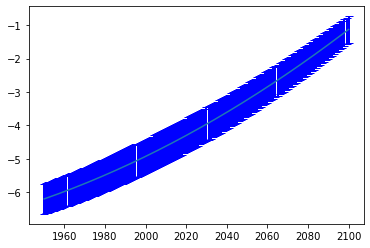

In [89]:
plt.errorbar(years, smtemp, yerr=polysmooth(years,abs(T-smtemp),2), markersize='10', ecolor='blue',capsize=4, elinewidth=2)

Text(0.5, 1.0, 'Temperature Moyenne')

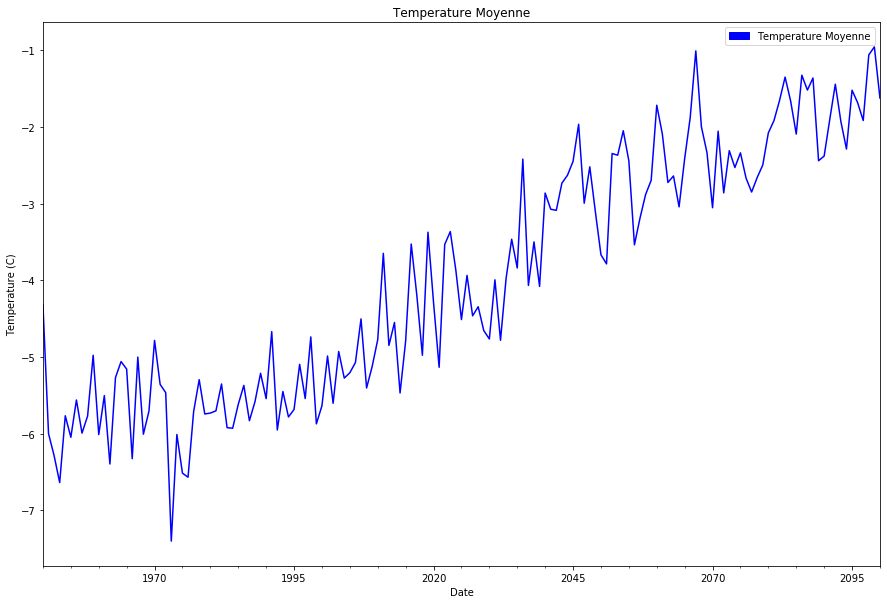

In [56]:
# plot time series
#roll = TnMeanC['tn_meanC'].rolling(50, center=True)
#roll.mean().plot.line('o-',color='blue',figsize=(15,10))
#plt.fill_between(roll.mean().index, roll.mean()-roll.std(), roll.mean()+roll.std())
TnMeanC.tn_meanC.interpolate("cubic").plot.line('o-',color='blue',figsize=(15,10))

# add colour reference
blue_patch = mpatches.Patch(color='blue', label='Temperature Moyenne')
plt.legend(handles=[blue_patch])

# add titles
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Moyenne')